In [1]:
import numpy as np
import pandas as pd
import nlpaug.augmenter.word as naw

In [2]:
# Loading data
df = pd.read_csv('balanced_augmented_Newdataset.csv')
print(df.shape)

(602, 4)


In [3]:
df.head(3)

,VoiceClip_No,TextTranscript,label,processed_content
0,Voice52,the experience was your agent responded positi...,Non,the experience was your agent responded positi...
1,Voice38,get not working all,Non,get not working all
2,Voice199,can know the current price the fiber connection,Non,can know the current price the fiber connection


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
x = df['TextTranscript']
y = df['label']

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}
Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

         Agg       0.89      0.94      0.91        63
         Non       0.93      0.88      0.90        58

    accuracy                           0.91       121
   macro avg       0.91      0.91      0.91       121
weighted avg       0.91      0.91      0.91       121



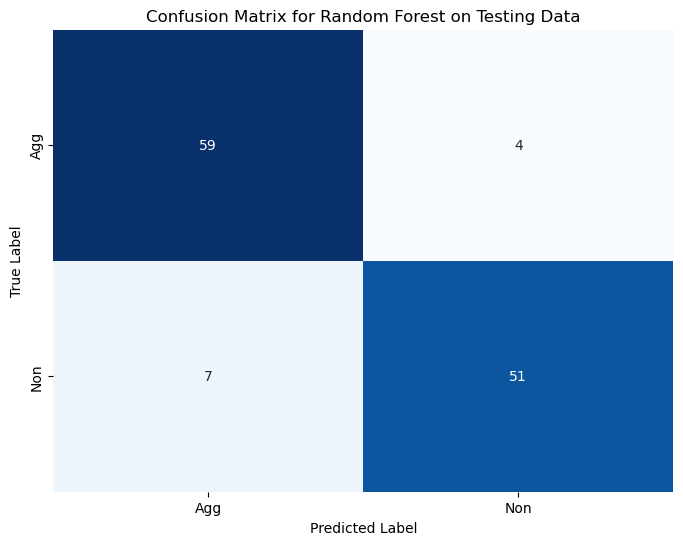

In [17]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'TextTranscript' and 'label' columns

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['TextTranscript'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization (converts the text data(comments) into numerical features)
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [20, 30, 40],  # Minimum samples required to split a node
    'min_samples_leaf': [10, 15, 20]  # Minimum samples required at a leaf node
}

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation on the training data to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=kf)
grid_search_rf.fit(X_train_tfidf, y_train)

# Best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the final Random Forest model with the best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_classifier.fit(X_train_tfidf, y_train)

# Predict class labels on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test_tfidf)

# Evaluate the final Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=final_rf_classifier.classes_,
            yticklabels=final_rf_classifier.classes_)
plt.title('Confusion Matrix for Random Forest on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
